# Grupo

1. **Nomes:** Sophie Dilhon e Débora Ghiotti

2. **Matrículas:** 2019107591 e 2018102579

3. **Email:** sophie.gama@edu.ufes.br e debora.ghiotti@edu.ufes.br

4. **Curso(s):** Ciência da Computação

5. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):** https://colab.research.google.com/drive/1a_rNDw53yCenBAktKXTlXbJ1SitjHT-j?usp=sharing

6. **Link para o vídeo:** https://drive.google.com/file/d/1j_zO-pOCB072qfwSOm5kahF-46tNHbvr/view?usp=sharing

# Introdução

Desde março de 2020, a população enfrenta a pandemia da COVID-19. Até o momento 395.021.000 pessoas foram contaminadas em todo o mundo e **5.740.223** morreram por conta da doença. O avanço e a gravidade da disseminação da mesma, assim como seus efeitos, levantam alguns questionamentos acerca dos grupos mais afetados pelo vírus com objetivo de impedir o aumento do número de óbitos e da letalidade do mesmo.

No estado do Espírito Santo, a doença também se dissemina com rapidez e agressividade. Já são 924 mil casos de contaminação confirmados, e desses cerca de **13.665** vieram a óbito. Nos últimos meses diversas campanhas de vacinação tem sido realizadas em todo o estado para diminuir os riscos de complicação da doença. 

Este trabalho visou fazer uma análise dos dados de covid em busca de alguma correlação entre os mesmos.

# Definição do problema

Por meio dos dados divulgados pelo governo do estado ([https://dados.es.gov.br/dataset/dados-sobre-pandemia-covid-19](https://dados.es.gov.br/dataset/dados-sobre-pandemia-covid-19)), será feita uma análise preditiva usando modelos não supervisionados para agrupamento dos grupos de risco, visando prover uma análise dos casos de óbito de forma a apoiar as campanhas de vacinação para que o governo possa voltar seus esforços para divulgação e fornecimento de mais vacinas para tais grupos e assim diminuir a letalidade da doença.

# Utils

In [ ]:
# Monta o Google Drive a VM Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/Datasci/Projeto/data

Mounted at /content/drive
/content/drive/MyDrive/Datasci/Projeto/data


In [ ]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
import seaborn as sns

In [ ]:
pip install kmodes

In [ ]:
def data_cluster(dados_slice):
  lista_bairro_slice = list(dados_slice['Bairro'].dropna().unique())
  lista_numero_casos_slice = []
  lista_numero_mortes_slice = []
  lista_mortalidade_slice = []
  lista_municipio_slice = []
  for bairro in lista_bairro_slice:
  
    casos_bairro = dados_slice.loc[dados_slice['Bairro'] == bairro]
    list(casos_bairro['Municipio'])[0]
    numero_casos = len(casos_bairro.loc[casos_bairro['Classificacao'] == 'Confirmados'])
    numero_mortes = len(casos_bairro.loc[casos_bairro['Evolucao'] == 'Óbito pelo COVID-19'])

    letalidade = numero_mortes/numero_casos

    lista_numero_casos_slice.append(numero_casos)
    lista_numero_mortes_slice.append(numero_mortes)
    lista_mortalidade_slice.append(letalidade)
    lista_municipio_slice.append(list(casos_bairro['Municipio'])[0])

    dados_bairros_slice = pd.DataFrame(list(zip(lista_bairro_slice, lista_numero_casos_slice,lista_numero_mortes_slice,lista_mortalidade_slice,lista_municipio_slice)),columns=['bairro','numero_casos','numero_mortes','letalidade','municipio'])
    dados_bairros_slice_x = dados_bairros_slice[['numero_casos', 'numero_mortes', 'letalidade']]
    dados_bairros_slice[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']] = (dados_bairros_slice_x-dados_bairros_slice_x.mean())/dados_bairros_slice_x.std()
  return dados_bairros_slice

In [ ]:
def info_slice(dados_slice,dados_bairros_slice):
  numero_casos_slice = len(dados_slice)
  numero_mortes_slice = len(dados_slice.loc[dados_slice['Evolucao'] == 'Óbito pelo COVID-19'])
  numero_bairros = len(dados_slice['Bairro'].unique())
  numero_clusters = len(dados_bairros_slice['cluster'].unique())
  print(f'Quantidade de bairros: {numero_bairros}')
  print(f'Quantidade de casos: {numero_casos_slice}')
  print(f'Quantidade de óbito: {numero_mortes_slice}')
  print(f'Quantidade de clusters: {numero_clusters}')

In [ ]:
def avalicao_clusters(dados_slice,dados_bairro_slice,k):
  numero_casos_slice = len(dados_slice)
  numero_mortes_slice = len(dados_slice.loc[dados_slice['Evolucao'] == 'Óbito pelo COVID-19'])
  lista_clusters_slice=[]
  lista_media_casos_slice=[]
  lista_media_mortes_slice=[]
  lista_media_letalidade_slice= []
  for cluster in range(k):
    print(f'Cluster {cluster}')
    cluster_data = dados_bairro_slice.loc[dados_bairro_slice['cluster'] == cluster]
    numero_casos_cluster = sum(cluster_data['numero_casos'])
    numero_mortes_cluster = sum(cluster_data['numero_mortes'])
    porcentagem_bairros =  len(cluster_data)/len(dados_bairro_slice)*100

  
    print(f'Quantidade de bairros: {len(cluster_data)}')
    print(f'Porcentagem do total de bairros: {porcentagem_bairros}')
    print(f'Quantidade de casos: {numero_casos_cluster}')
    print(f'Quantidade de óbito: {numero_mortes_cluster}')
    print(f'Porcentagem de casos: {(numero_casos_cluster/numero_casos_slice)*100}')
    print(f'Porcentagem de óbito: {(numero_mortes_cluster/numero_mortes_slice)*100}')
    print(cluster_data[['numero_casos','numero_mortes','letalidade']].describe().loc[['mean', 'min', 'max']])
    print('---------------------------------------------------------------\n\n')

In [ ]:
def plot_cluster(dados_plot,cluster):
  #fig = plt.figure(figsize = (16,16), facecolor = None, frameon=False) 
  fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(30,8))
  scatter1 = ax1.scatter(dados_plot['numero_casos'], dados_plot['numero_mortes'], c=cluster, s=50, cmap='viridis')
  legend1 = ax1.legend(*scatter1.legend_elements(),loc="upper right", title="Clusters",frameon=True)
  ax1.add_artist(legend1)
  ax1.set_title('Numero de Casos x Numero de Mortes')

  scatter2 = ax2.scatter(dados_plot['numero_casos'], dados_plot['letalidade'], c=cluster, s=50, cmap='viridis')
  legend2 = ax2.legend(*scatter2.legend_elements(),loc="upper right", title="Clusters",frameon=True)
  ax2.add_artist(legend2)
  ax2.set_title('Numero de Casos x Taxa de letalidade')

  scatter3 = ax3.scatter(dados_plot['numero_mortes'], dados_plot['letalidade'], c=cluster, s=50, cmap='viridis')
  legend3 = ax3.legend(*scatter3.legend_elements(),loc="upper right", title="Clusters",frameon=True)
  ax3.add_artist(legend3)
  ax3.set_title('Numero de Mortes x Taxa de letalidade')

  plt.show()

# Avaliação 1

## Descrição do conjunto de dados

Os dados foram obtidos neste [site](https://dados.es.gov.br/dataset/dados-sobre-pandemia-covid-19/resource/38cc5066-020d-4c5a-b4c0-e9f690deb6d4) na data 05/03/2022. 


In [ ]:
dados = pd.read_csv('MICRODADOS.csv', encoding='iso-8859-1', on_bad_lines='skip', sep=';')
dados.shape

(3411279, 45)

In [ ]:
dados.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

Tendo em vista a quantidade de features e a análise que será feita, decidiu-se retirar features que não teriam relação com o óbito, como datas de coletas ou features que possuíam uma quantidade diferente de resultados muito insignificantes, como Gestante.

Além disso, decidiu-se filtrar os dados para considerar apenas aqueles que possuíam como evolução da doença o óbito e retirar cidades fora da Grande Vitória.

In [ ]:
dados_obitos = dados.loc[dados['Evolucao'] == 'Óbito pelo COVID-19']

dados_obitos = dados_obitos.drop(columns=['DataNotificacao', 'DataCadastro', 'DataColeta_RT_PCR', 'DataColetaTesteRapido', 
                                          'DataColetaSorologia', 'DataColetaSorologiaIGG', 'DataEncerramento', 'Classificacao',
                                          'Evolucao', 'CriterioConfirmacao',	'StatusNotificacao', 'IdadeNaDataNotificacao', 
                                          'ResultadoRT_PCR', 'ResultadoTesteRapido', 'ResultadoSorologia', 'ResultadoSorologia_IGG', 
                                          'TipoTesteRapido', 'ViagemBrasil', 'ViagemInternacional', 'Gestante'])
dados_obitos = dados_obitos.reset_index(drop=True)

dados_obitos = dados_obitos.loc[dados_obitos['Municipio'].isin(['CARIACICA', 'FUNDAO', 'GUARAPARI', 'SERRA', 'VIANA', 'VILA VELHA', 'VITORIA'])]

dados_obitos.head()

,DataDiagnostico,DataObito,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,...,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua
0,2022-02-28,2022-03-02,VITORIA,JARDIM CAMBURI,80 a 89 anos,F,Branca,Não se aplica,Sim,Sim,...,Não,Sim,Não,Não,Não,Não,Sim,Não,Não,Não
2,2022-02-24,2022-03-01,SERRA,JARDIM BELA VISTA,60 a 69 anos,F,Parda,1ª a 4ª série incompleta do EF (antigo primári...,Não,Sim,...,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não
8,2022-02-10,2022-02-27,VILA VELHA,COQUEIRAL DE ITAPARICA,70 a 79 anos,M,Branca,Educação superior completa,Sim,Sim,...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não
10,2022-02-01,2022-02-22,VITORIA,CONSOLAÇÃO,60 a 69 anos,F,Parda,Ignorado,Sim,Sim,...,Não,Sim,Não,Sim,Não,Sim,Sim,Não,Não,Não
11,2022-02-20,2022-02-24,VILA VELHA,VISTA DA PENHA,80 a 89 anos,M,Amarela,Ignorado,Não,Sim,...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não


Percebeu-se que muitos dos features possuem elevada taxa de dados preenchidos como *Ignorado* o que dificulta a análise dos mesmos, como por exemplo na análise do feature de escolaridade que possui mais de 40% dos dados preenchidos como Ignorado.

Outro fator interessante, é que ao observar os dados de comorbidades, notou-se que a grande maioria dos óbitos não apresentava comorbidade. Com esses dados nossa hipótese é de que não será possível agrupar os pacientes em padrões comuns, uma vez que os dados possuem muitos dados incompletos ou insignificantes.

No entanto, nota-se que os óbitos de fato ocorreram em sua maioria em idosos, sendo cerca de 80% dos óbitos na faixa etária de 50 a 89 anos.

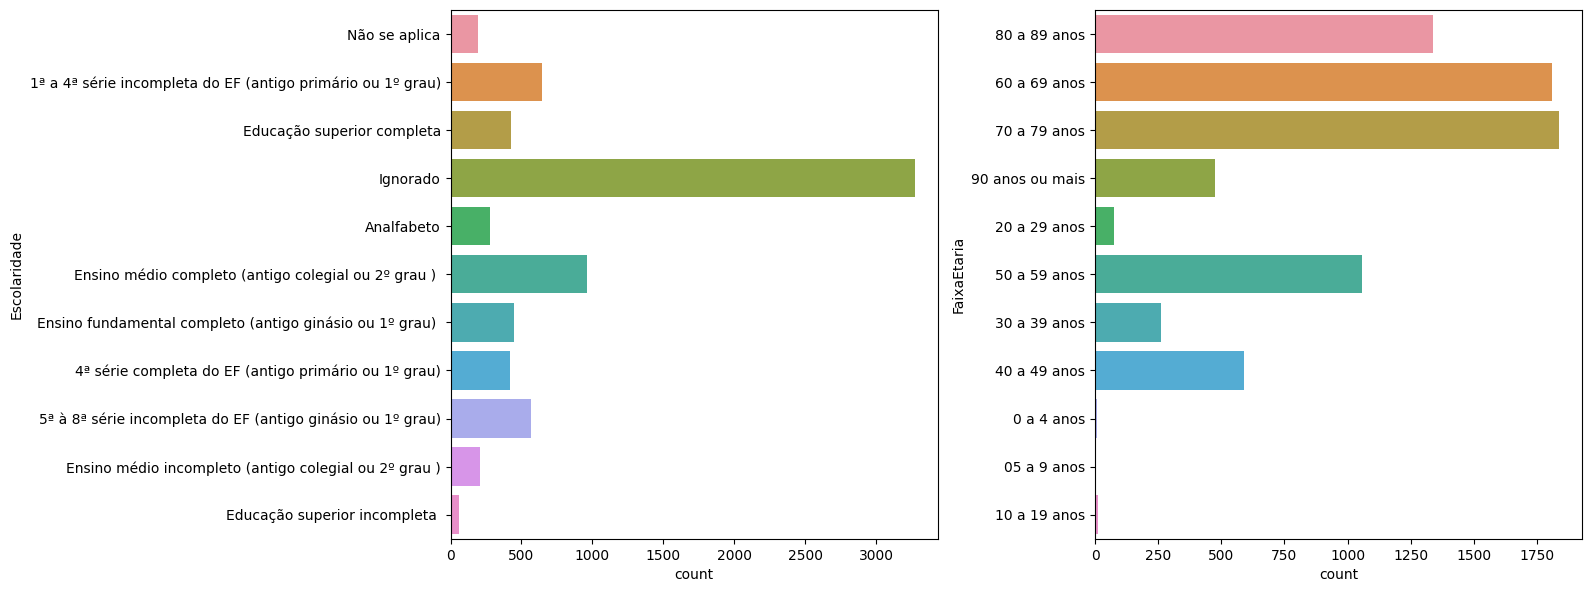

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (16,6), facecolor = None, frameon=False) 

fig = plt.subplot(1, 2, 1)
sns.countplot(y='Escolaridade', data = dados_obitos)

fig = plt.subplot(1, 2, 2)
sns.countplot(y='FaixaEtaria', data = dados_obitos)

plt.tight_layout(pad = 1) 

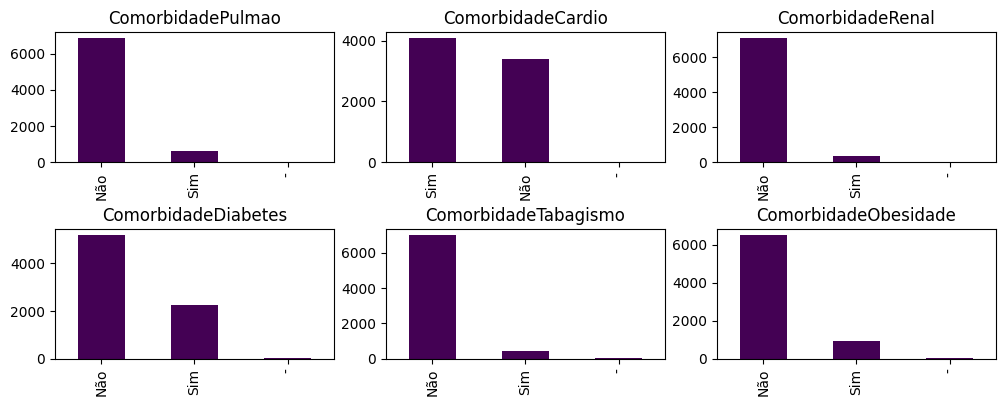

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (10,4), facecolor = None, frameon=False) 

fig = plt.subplot(2, 3, 1)
dados_obitos['ComorbidadePulmao'].value_counts().plot(kind='bar', title='ComorbidadePulmao', colormap='viridis')

fig = plt.subplot(2, 3, 2)
dados_obitos['ComorbidadeCardio'].value_counts().plot(kind='bar', title='ComorbidadeCardio', colormap='viridis')

fig = plt.subplot(2, 3, 3)
dados_obitos['ComorbidadeRenal'].value_counts().plot(kind='bar', title='ComorbidadeRenal', colormap='viridis')

fig = plt.subplot(2, 3, 4)
dados_obitos['ComorbidadeDiabetes'].value_counts().plot(kind='bar', title='ComorbidadeDiabetes', colormap='viridis')

fig = plt.subplot(2, 3, 5)
dados_obitos['ComorbidadeTabagismo'].value_counts().plot(kind='bar', title='ComorbidadeTabagismo', colormap='viridis')

fig = plt.subplot(2, 3, 6)
dados_obitos['ComorbidadeObesidade'].value_counts().plot(kind='bar', title='ComorbidadeObesidade', colormap='viridis')

plt.tight_layout(pad = 0.5) 

In [ ]:
# Divide as datas em mes e ano
dados_obitos[['DataObitoAno', 'DataObitoMes', 'DataObitoDia']] = dados_obitos['DataObito'].str.split('-', expand=True)
dados_obitos[['DataDiagnosticoAno', 'DataDiagnosticoMes', 'DataDiagnosticoDia']] = dados_obitos['DataDiagnostico'].str.split('-', expand=True)

dados_obitos = dados_obitos.drop(columns=['DataObito', 'DataObitoDia', 'DataDiagnostico', 'DataDiagnosticoDia'])
dados_obitos

,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,Tosse,Coriza,...,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,DataObitoAno,DataObitoMes,DataDiagnosticoAno,DataDiagnosticoMes
0,VITORIA,JARDIM CAMBURI,80 a 89 anos,F,Branca,Não se aplica,Sim,Sim,Sim,Sim,...,Não,Não,Sim,Não,Não,Não,2022,03,2022,02
2,SERRA,JARDIM BELA VISTA,60 a 69 anos,F,Parda,1ª a 4ª série incompleta do EF (antigo primári...,Não,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2022,03,2022,02
8,VILA VELHA,COQUEIRAL DE ITAPARICA,70 a 79 anos,M,Branca,Educação superior completa,Sim,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,2022,02,2022,02
10,VITORIA,CONSOLAÇÃO,60 a 69 anos,F,Parda,Ignorado,Sim,Sim,Não,Não,...,Não,Sim,Sim,Não,Não,Não,2022,02,2022,02
11,VILA VELHA,VISTA DA PENHA,80 a 89 anos,M,Amarela,Ignorado,Não,Sim,Sim,Não,...,Não,Não,Não,Não,Não,Não,2022,02,2022,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,SERRA,JARDIM TROPICAL,80 a 89 anos,M,Ignorado,Ignorado,Não,Sim,Sim,Não,...,Não,Não,Não Informado,Ignorado,Não,Não,2020,05,2020,03
14171,GUARAPARI,CENTRO,50 a 59 anos,M,Branca,Ignorado,Sim,Sim,Sim,Não,...,Não,Não,Sim,Não,Não,Não,2020,05,2020,03
14172,VILA VELHA,PRAIA DA COSTA,50 a 59 anos,M,Ignorado,Ignorado,Sim,Não,Sim,Não,...,Não,Não,Sim,Ignorado,Não,Não,2020,05,2020,03
14175,SERRA,VALPARAÍSO,50 a 59 anos,M,Parda,Ignorado,Sim,Sim,Sim,Não,...,-,-,Ignorado,Ignorado,Não,Não,2020,04,2020,03


## Algoritmo

Como são utilizados dados categóricos, existe a opção de utilizar o one hot encoder e os algoritmos de agrupamento para dados não categóricos, ou usar um algoritmo para dados categóricos. Neste último não é possível medir a distância entre os pontos, como é feito com o Kmeans, assim escolhemos o **Kmodes** que usa dissimilaridades entre os pontos para comparar os pontos e o quão próximos estão.


referências: 
- https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
- https://github.com/nicodv/kmodes

### Escolhendo o número de clusters

In [ ]:
%%capture
from kmodes.kmodes import KModes

cost = []
K = range(2,10)
for num_clusters in list(K):
    print('\n\nCLUSTER ', num_clusters)
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(dados_obitos)
    cost.append(kmode.cost_)

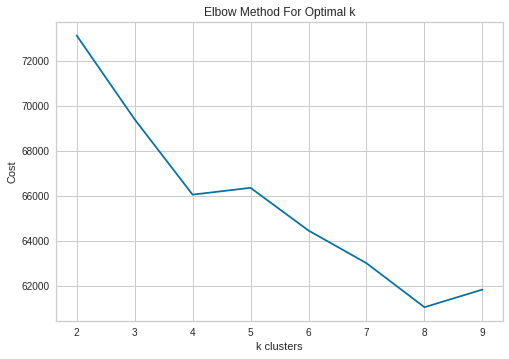

In [ ]:
#@title
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Analisando o gráfico obtido usaremos como valor de *k* 4, pelo método *Huang*.

### Rodando o algoritmo Kmodes com 4 clusters

In [ ]:
%%capture

km = KModes(n_clusters=4, init='Huang', n_init=1, verbose=1)

clusters = km.fit_predict(dados_obitos)

print("\n--Print the cluster centroids--")
print(km.cluster_centroids_)

dados_obitos['Clusters'] = clusters

## Análise dos resultados

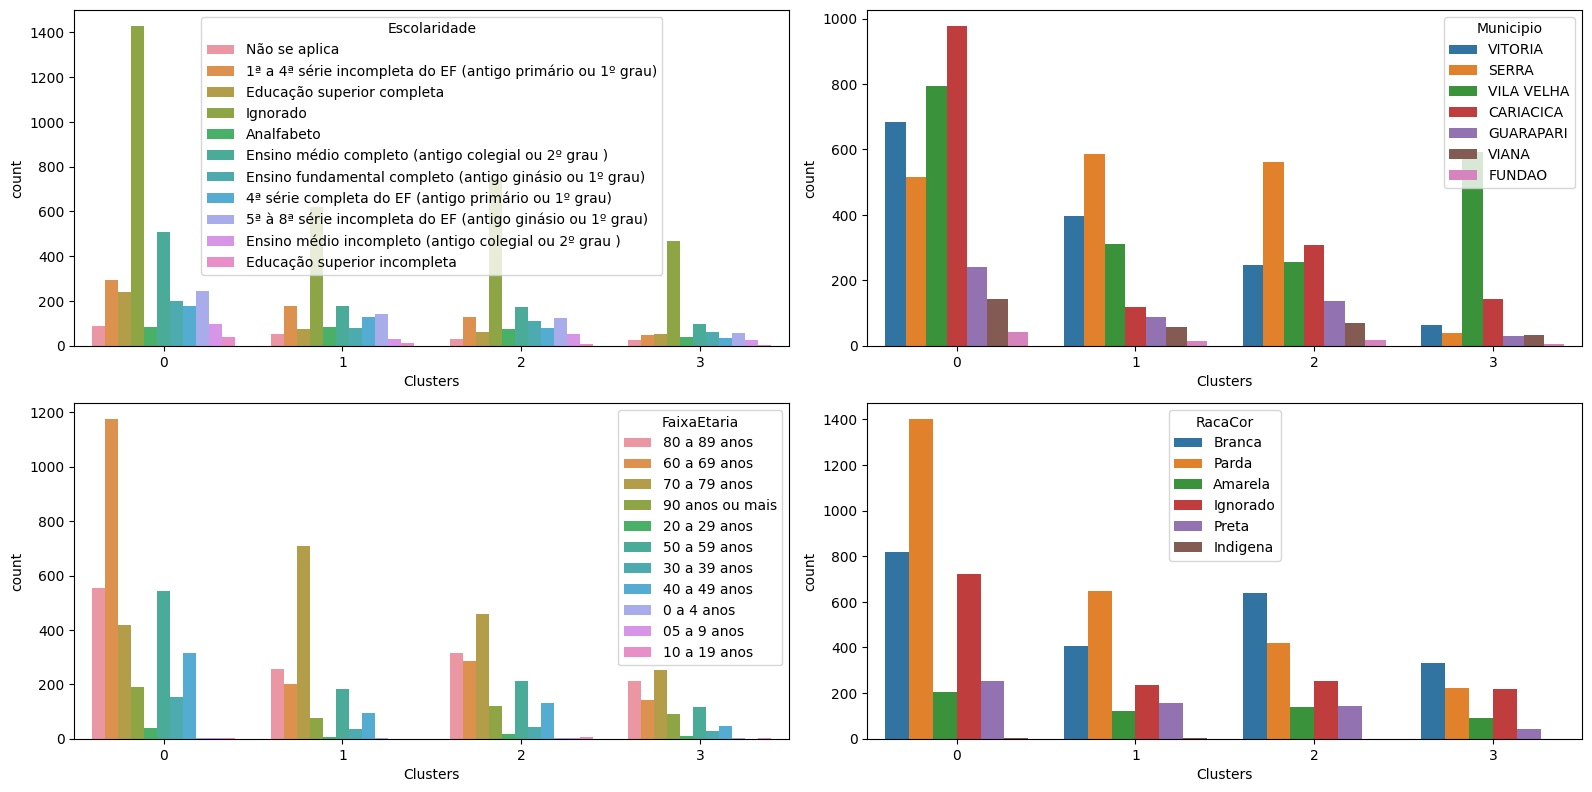

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (16,8), facecolor = None, frameon=True) 

fig = plt.subplot(2, 2, 1)
sns.countplot(x='Clusters',hue='Escolaridade', data = dados_obitos)

fig = plt.subplot(2, 2, 2)
sns.countplot(x='Clusters',hue='Municipio', data = dados_obitos)

fig = plt.subplot(2, 2, 3)
sns.countplot(x='Clusters',hue='FaixaEtaria', data = dados_obitos)

fig = plt.subplot(2, 2, 4)
sns.countplot(x='Clusters',hue='RacaCor', data = dados_obitos)

plt.tight_layout(pad = 1) 

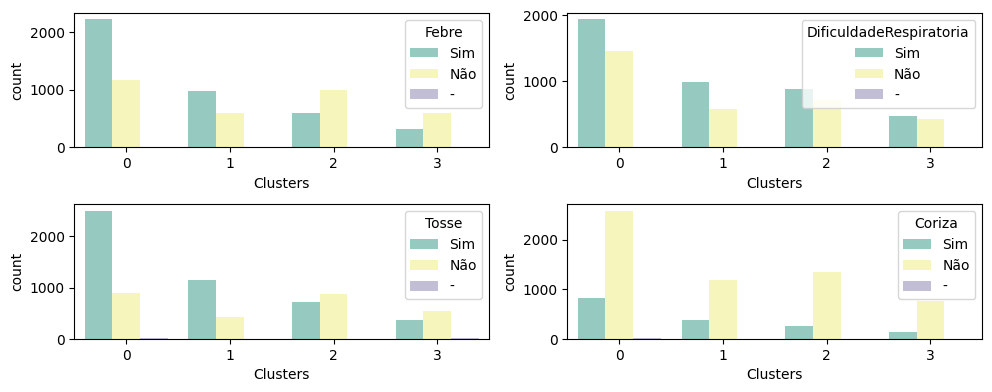

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (10,4), facecolor = None, frameon=False) 

fig = plt.subplot(2, 2, 1)
sns.countplot(x='Clusters',hue='Febre', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 2)
sns.countplot(x='Clusters',hue='DificuldadeRespiratoria', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 3)
sns.countplot(x='Clusters',hue='Tosse', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 4)
sns.countplot(x='Clusters',hue='Coriza', data = dados_obitos, palette='Set3')

plt.tight_layout(pad = 1) 

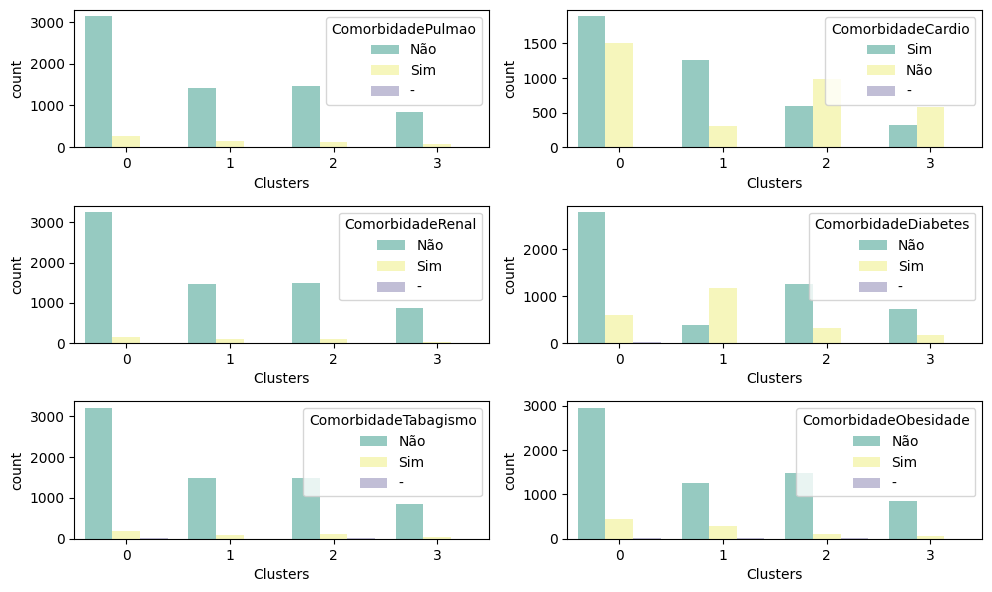

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (10,6), facecolor = None, frameon=False) 

fig = plt.subplot(3, 2, 1)
sns.countplot(x='Clusters',hue='ComorbidadePulmao', data = dados_obitos, palette='Set3')

fig = plt.subplot(3, 2, 2)
sns.countplot(x='Clusters',hue='ComorbidadeCardio', data = dados_obitos, palette='Set3')

fig = plt.subplot(3, 2, 3)
sns.countplot(x='Clusters',hue='ComorbidadeRenal', data = dados_obitos, palette='Set3')

fig = plt.subplot(3, 2, 4)
sns.countplot(x='Clusters',hue='ComorbidadeDiabetes', data = dados_obitos, palette='Set3')

fig = plt.subplot(3, 2, 5)
sns.countplot(x='Clusters',hue='ComorbidadeTabagismo', data = dados_obitos, palette='Set3')

fig = plt.subplot(3, 2, 6)
sns.countplot(x='Clusters',hue='ComorbidadeObesidade', data = dados_obitos, palette='Set3')

plt.tight_layout(pad = 1) 

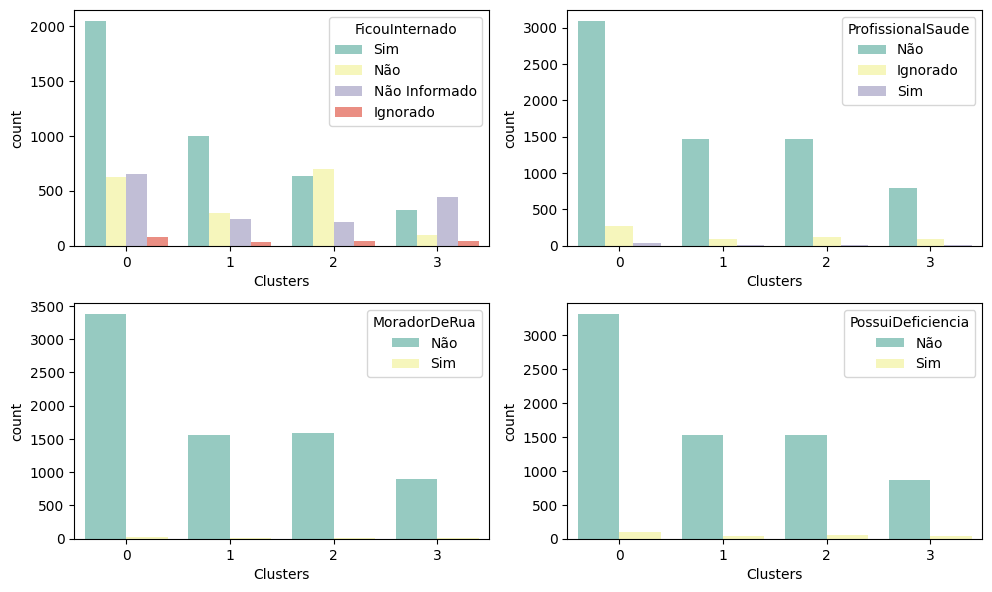

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (10,6), facecolor = None, frameon=False) 

fig = plt.subplot(2, 2, 1)
sns.countplot(x='Clusters',hue='FicouInternado', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 2)
sns.countplot(x='Clusters',hue='ProfissionalSaude', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 3)
sns.countplot(x='Clusters',hue='MoradorDeRua', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 4)
sns.countplot(x='Clusters',hue='PossuiDeficiencia', data = dados_obitos, palette='Set3')

plt.tight_layout(pad = 1) 

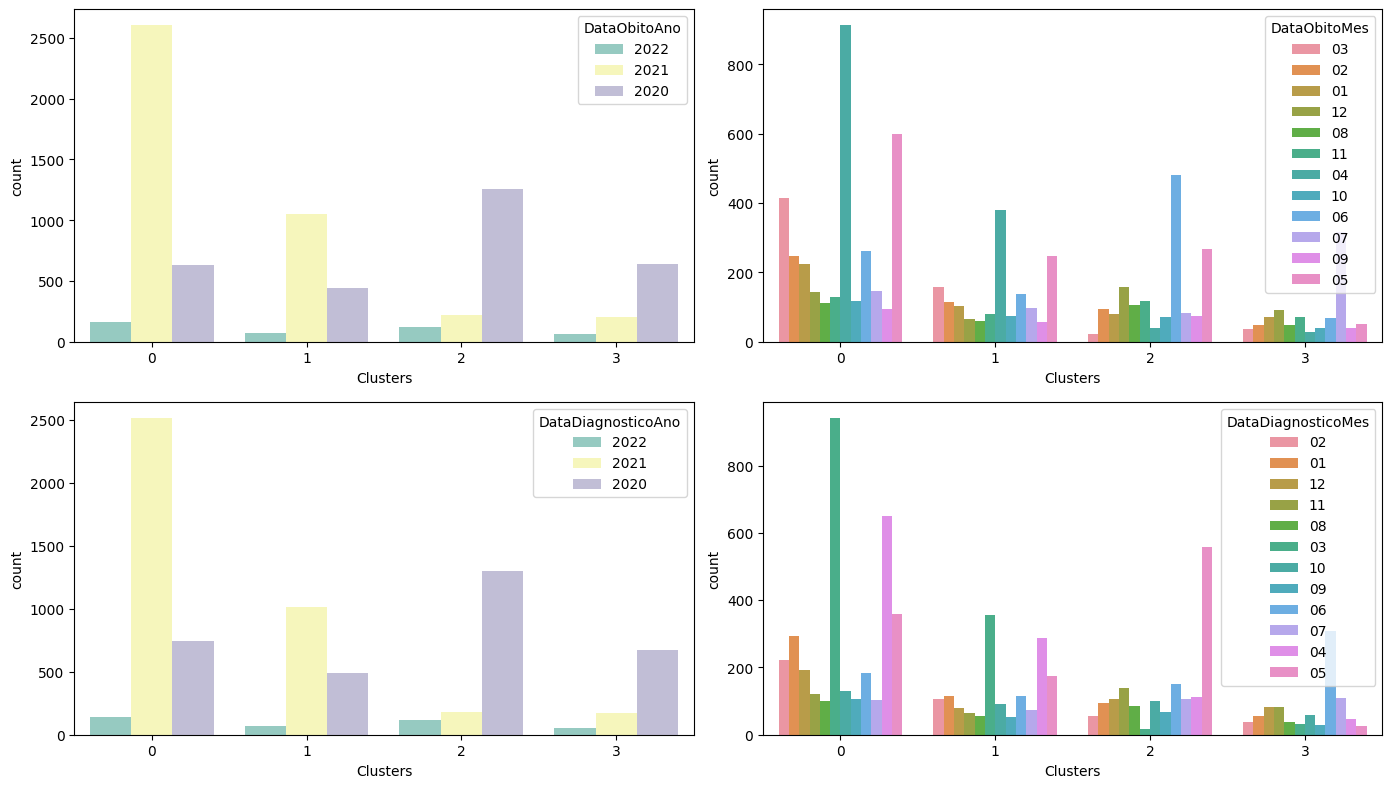

In [ ]:
#@title
plt.rcdefaults()
fig = plt.figure(figsize = (14,8), facecolor = None, frameon=False) 

fig = plt.subplot(2, 2, 1)
sns.countplot(x='Clusters',hue='DataObitoAno', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 2)
sns.countplot(x='Clusters',hue='DataObitoMes', data = dados_obitos)

fig = plt.subplot(2, 2, 3)
sns.countplot(x='Clusters',hue='DataDiagnosticoAno', data = dados_obitos, palette='Set3')

fig = plt.subplot(2, 2, 4)
sns.countplot(x='Clusters',hue='DataDiagnosticoMes', data = dados_obitos)

plt.tight_layout(pad = 1) 

Ao observar alguns dos features de cada um dos clusters, percebeu-se que não havia tanta correlação entre os mesmos. Observou-se que grande parte dos features apenas se dividiam igualmente entre os clusters. Os features que mais pareceram influenciar na clusterização foram as datas.

Assim, por não chegarmos a uma conclusão acerca dos agrupamentos dos grupos de risco decidiu-se não testar os dados com um modelo que não aceite dados categóricos, assim, pensamos em realizar o agrupamento utilizando diferentes features.

# Avaliação 2


Após a tentativa de analisar os casos de covid com base nas features dos pacientes como sexo, idade e etc, partimos para outra abordagem. Para isso, procuramos na literatura estudos sobre clusteriação de casos de covid em todo mundo. Dos principais artigos selecionados, esses tomavam como ponto de partida regiões geográficas e clusterizavam essas regiões com base em alguns parametros. 

Nesse primeiro [artigo](https://iopscience.iop.org/article/10.1088/1742-6596/1783/1/012027/meta) desenvolvido por um grupo de pesquisadores da Indonésia, os países do Sudeste asiatico foram clusterizados com base em dois parametros: número total de casos confirmados e número total de óbitos. A partir dos clusters criados, os países foram classificados em High Cluster, Normal Cluster e High Cluster utilizando o algoritmo K-means.

Além disso, tambem estudamos esse [artigo](https://rsdjournal.org/index.php/rsd/article/view/9059) desenvolvido por pesquisadores brasileiros que tambem utilizam o K-means para clusterizar os estados do Brasil. Nesse estudp foi utilizado como parametros as médias dos coeficientes de incidência, prevalência e letalidade na fase inicial da doença por cada 100 habitantes.

Tendo como base os artigos citados acima e uma analise dos dados disponiveis, realizamos a clusterização dos bairros da Grande Vitória com base em três parametros: número total de casos de covid, número total de óbitos e a taxa de letalidade (numero de mortes/numero de casos). A clusterização foi feita com o algortimos k-means.

Além disso, realizamos uma divisão dos casos de covid em 5 slices de tempo:



*   Slice 1: Abril de 2020 a Agosto de 2020
*   Slice 2: Setembro de 2020 a Janeiro de 2021
*   Slice 3: Fevereiro de 2021 a Junho de 2021
*   Slice 4: Julho de 2021 a Novembro de 2021
*   Slice 5: Dezembro de 2021 a Fevereiro de 2022.

Essa divisão foi feita analisando os gráficos dos casos de covid e de óbito presentes no painel de Covid. Cada slice possuim um periodo de 5 meses, exceto o último que possui 3.



## Tratamento geral dos dados
Leitura dos dados do painel de covid do estado com os casos de Janeiro de 2020 a Fevereiro de 2022. Filtro realizados:


*   Selecionando apenas a Grande Vitória
*   Selecionando apenas os casos de covid confirmados



In [ ]:
dados = pd.read_csv('MICRODADOS.csv', encoding='iso-8859-1', on_bad_lines='skip', sep=';')

In [ ]:
dados_gv = dados.loc[dados['Municipio'].isin(['CARIACICA', 'SERRA', 'VILA VELHA', 'VITORIA'])]

In [ ]:
dados_gv = dados_gv.loc[dados_gv['Classificacao'].isin(['Confirmados'])]

In [ ]:
dados_gv[['DataDiagnosticoAno', 'DataDiagnosticoMes', 'DataDiagnosticoDia']] = dados_gv['DataDiagnostico'].str.split('-', expand=True)

### Primeiro slice

Abril 2020 - Agosto 2020

In [ ]:
dados_slice1 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2020'])]
dados_slice1 = dados_slice1.loc[dados_slice1['DataDiagnosticoMes'].isin(['04','05','06','07','08'])]

In [ ]:
dados_bairros_slice1 = data_cluster(dados_slice1)

In [ ]:
le_upper_limit_slice1 = dados_bairros_slice1['letalidade'].mean() + 1.5*dados_bairros_slice1['letalidade'].std()
dados_bairros_slice1 = dados_bairros_slice1.loc[dados_bairros_slice1['letalidade'] < le_upper_limit_slice1]

#### Selecionando o número de clusters com o método Elbow

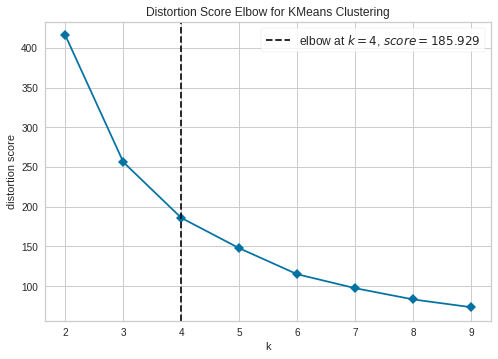

In [ ]:
kmeans_slice1 = KMeans() 
visualizer = KElbowVisualizer(kmeans_slice1, k=(2, 10), timings=False)
visualizer.fit(dados_bairros_slice1[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
visualizer.show() 

#### Realizando a clusterização dos dados

In [ ]:
kmeans_bairros_slice1 = KMeans(n_clusters = 4) 
kmeans_bairros_slice1.fit(dados_bairros_slice1[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
y_kmeans_bairros_slice1 = kmeans_bairros_slice1.predict(dados_bairros_slice1[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])

In [ ]:
dados_bairros_slice1['cluster'] = y_kmeans_bairros_slice1

### Segundo slice

Setembro 2020 - Jan 2021

In [ ]:
dados_slice2_1 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2020'])]
dados_slice2_1 = dados_slice2_1.loc[dados_slice2_1['DataDiagnosticoMes'].isin(['09','10','11','12'])]
dados_slice2_2 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2021'])]
dados_slice2_2 = dados_slice2_2.loc[dados_slice2_2['DataDiagnosticoMes'].isin(['01'])]

dados_slice2 = pd.concat([dados_slice2_1,dados_slice2_2])

In [ ]:
dados_bairros_slice2 = data_cluster(dados_slice2)

In [ ]:
le_upper_limit_slice2 = dados_bairros_slice2['letalidade'].mean() + 1.5*dados_bairros_slice2['letalidade'].std()
dados_bairros_slice2 = dados_bairros_slice2.loc[dados_bairros_slice2['letalidade'] < le_upper_limit_slice2]

#### Selecionando o número de clusters com o método Elbow

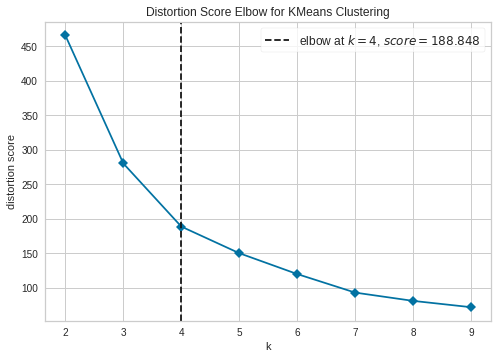

In [ ]:
kmeans_slice2 = KMeans() 
visualizer = KElbowVisualizer(kmeans_slice2, k=(2, 10), timings=False)
visualizer.fit(dados_bairros_slice2[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
visualizer.show() 

#### Realizando a clusterização dos dados

In [ ]:
kmeans_bairros_slice2 = KMeans(n_clusters = 4) 
kmeans_bairros_slice2.fit(dados_bairros_slice2[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
y_kmeans_bairros_slice2 = kmeans_bairros_slice2.predict(dados_bairros_slice2[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])

In [ ]:
dados_bairros_slice2['cluster'] = y_kmeans_bairros_slice2
dados_bairros_slice2['cluster'].value_counts()

3    204
0    128
2     53
1      6
Name: cluster, dtype: int64

### Terceiro slice

Fevereiro 2021 - Junho 2021

In [ ]:
dados_slice3 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2021'])]
dados_slice3 = dados_slice3.loc[dados_slice3['DataDiagnosticoMes'].isin(['02','03','04','05','06'])]

In [ ]:
dados_bairros_slice3 = data_cluster(dados_slice3)

In [ ]:
le_upper_limit_slice3 = dados_bairros_slice3['letalidade'].mean() + 1.5*dados_bairros_slice3['letalidade'].std()
dados_bairros_slice3 = dados_bairros_slice3.loc[dados_bairros_slice3['letalidade'] < le_upper_limit_slice3]

#### Selecionando o número de clusters com o método Elbow

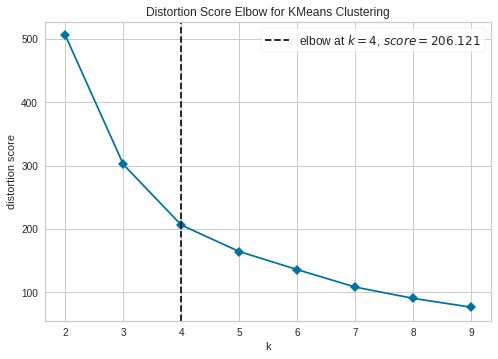

In [ ]:
kmeans_slice3 = KMeans() 
visualizer = KElbowVisualizer(kmeans_slice3, k=(2, 10), timings=False)
visualizer.fit(dados_bairros_slice3[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
visualizer.show() 

#### Realizando a clusterização dos dados

In [ ]:
kmeans_bairros_slice3 = KMeans(n_clusters = 4) 
kmeans_bairros_slice3.fit(dados_bairros_slice3[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
y_kmeans_bairros_slice3 = kmeans_bairros_slice3.predict(dados_bairros_slice3[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])

In [ ]:
dados_bairros_slice3['cluster'] = y_kmeans_bairros_slice3
dados_bairros_slice3['cluster'].value_counts()

2    171
0    164
3     61
1      6
Name: cluster, dtype: int64

### Quarto slice

Julho 2021 - Novembro 2021

In [ ]:
dados_slice4 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2021'])]
dados_slice4 = dados_slice4.loc[dados_slice4['DataDiagnosticoMes'].isin(['07','08','09','10','11'])]

In [ ]:
dados_bairros_slice4 = data_cluster(dados_slice4)

In [ ]:
le_upper_limit_slice4 = dados_bairros_slice4['letalidade'].mean() + 1.5*dados_bairros_slice4['letalidade'].std()
dados_bairros_slice4 = dados_bairros_slice4.loc[dados_bairros_slice4['letalidade'] < le_upper_limit_slice3]

#### Selecionando o número de clusters com o método Elbow

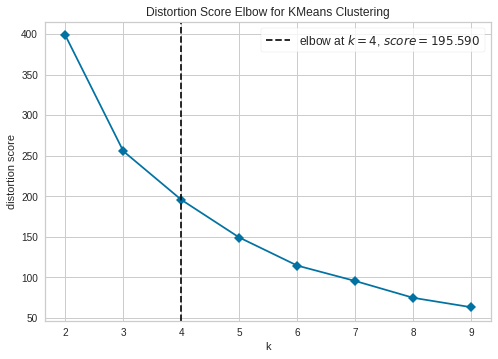

In [ ]:
kmeans_slice4 = KMeans() 
visualizer = KElbowVisualizer(kmeans_slice4, k=(2, 10), timings=False)
visualizer.fit(dados_bairros_slice4[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
visualizer.show() 

#### Realizando a clusterização dos dados

In [ ]:
kmeans_bairros_slice4 = KMeans(n_clusters = 4) 
kmeans_bairros_slice4.fit(dados_bairros_slice4[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
y_kmeans_bairros_slice4 = kmeans_bairros_slice4.predict(dados_bairros_slice4[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])

In [ ]:
dados_bairros_slice4['cluster'] = y_kmeans_bairros_slice4
dados_bairros_slice4['cluster'].value_counts()

0    285
1    102
3      8
2      1
Name: cluster, dtype: int64

### Quinto slice

Dezembro 2021 - Fevereiro 2022

In [ ]:
dados_slice5_1 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2021'])]
dados_slice5_2 = dados_slice5_1.loc[dados_slice5_1['DataDiagnosticoMes'].isin(['12'])]
dados_slice5_2 = dados_gv.loc[dados_gv['DataDiagnosticoAno'].isin(['2022'])]
dados_slice5_2 = dados_slice5_2.loc[dados_slice5_2['DataDiagnosticoMes'].isin(['01','02'])]

dados_slice5 = pd.concat([dados_slice5_1,dados_slice5_2])

In [ ]:
dados_bairros_slice5 = data_cluster(dados_slice5)

In [ ]:
le_upper_limit_slice5 = dados_bairros_slice5['letalidade'].mean() + 1.5*dados_bairros_slice5['letalidade'].std()
dados_bairros_slice5 = dados_bairros_slice5.loc[dados_bairros_slice5['letalidade'] < le_upper_limit_slice5]

#### Selecionando o número de clusters com o método Elbow

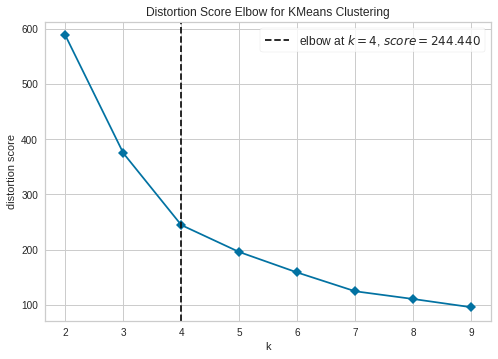

In [ ]:
kmeans_slice5 = KMeans() 
visualizer = KElbowVisualizer(kmeans_slice5, k=(2, 10), timings=False)
visualizer.fit(dados_bairros_slice5[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
visualizer.show() 

#### Realizando a clusterização dos dados

In [ ]:
kmeans_bairros_slice5 = KMeans(n_clusters = 4) 
kmeans_bairros_slice5.fit(dados_bairros_slice5[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])
y_kmeans_bairros_slice5 = kmeans_bairros_slice5.predict(dados_bairros_slice5[['numero_casos_std', 'numero_mortes_std', 'letalidade_std']])

In [ ]:
dados_bairros_slice5['cluster'] = y_kmeans_bairros_slice5
dados_bairros_slice5['cluster'].value_counts()

0    189
3    143
2     59
1      7
Name: cluster, dtype: int64

## Analise dos resultados


A primeira parte da analise dos resultados é caracterizar os clusters de cada slice. Para fazer essa analise foram considerados os seguintes fatores:



*   Número mínimo, máximo e médio de casos de covid por bairro
*   Número mínimo, máximo e médio de óbitos por bairro
*   Número mínimo, máximo e médio da taxa de letalidade
*   Porcentagem do número de casos do cluster em relação ao número total de casos do slice.
*   Porcentagem do número de óbito do cluster em relação ao número total de casos do óbito.

### Slice 1
O primeiro slice de tempo analisado é do periodo de Abril de 2020 a Agosto de 2020. Para esse periodo, o valor de clusters encontrado foi 4. O número total de casos desse periodo foi 59978 e o número de óbitos foi 1882.


In [ ]:
info_slice(dados_slice1,dados_bairros_slice1)

Quantidade de bairros: 419
Quantidade de casos: 59978
Quantidade de óbito: 1882
Quantidade de clusters: 4


In [ ]:
avalicao_clusters(dados_slice1,dados_bairros_slice1,4)

Cluster 0
Quantidade de bairros: 111
Porcentagem do total de bairros: 26.941747572815533
Quantidade de casos: 21241
Quantidade de óbito: 781
Porcentagem de casos: 35.414652039081
Porcentagem de óbito: 41.498405951115835
      numero_casos  numero_mortes  letalidade
mean     191.36036       7.036036    0.042425
min       50.00000       2.000000    0.005682
max      353.00000      14.000000    0.125000
---------------------------------------------------------------


Cluster 1
Quantidade de bairros: 259
Porcentagem do total de bairros: 62.86407766990292
Quantidade de casos: 14090
Quantidade de óbito: 358
Porcentagem de casos: 23.491947047250658
Porcentagem de óbito: 19.02231668437832
      numero_casos  numero_mortes  letalidade
mean     54.401544       1.382239    0.026032
min       1.000000       0.000000    0.000000
max     230.000000       4.000000    0.142857
---------------------------------------------------------------


Cluster 2
Quantidade de bairros: 7
Porcentagem do total de 

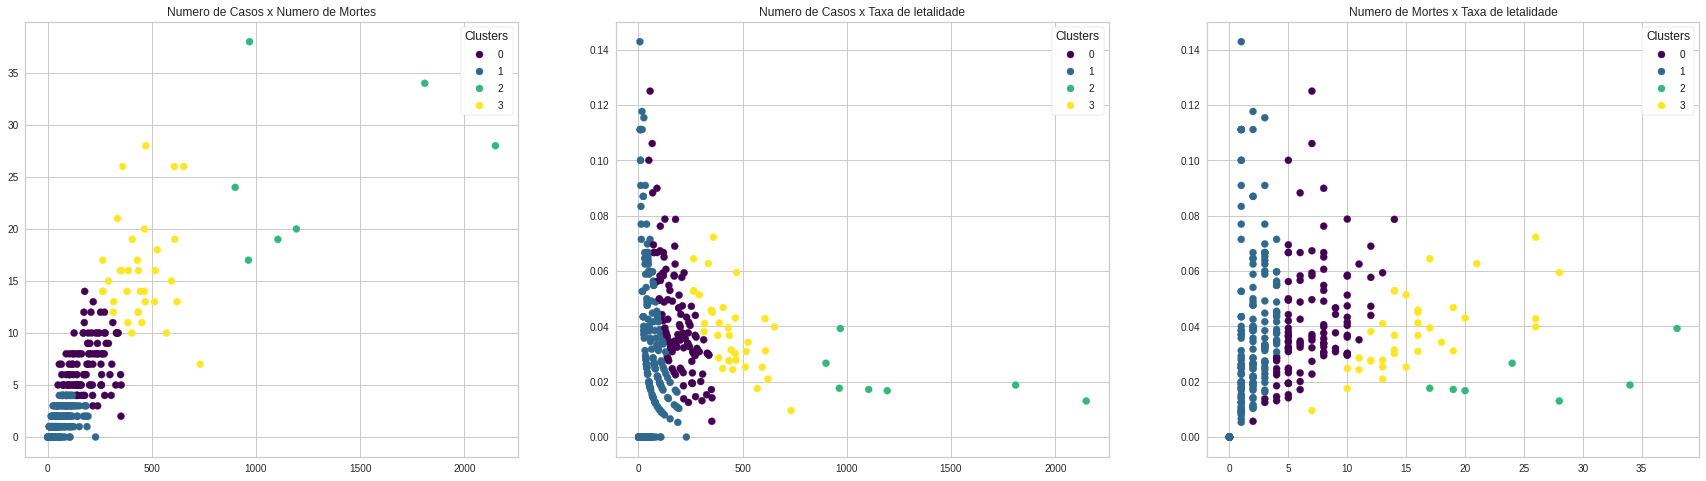

In [ ]:
plot_cluster(dados_bairros_slice1,dados_bairros_slice1['cluster'])

#### Analise dos clusters

##### Cluster 0
O cluster 0, apesar de possuir uma taxa de letalidade média alta (4%) e representar 40% do total de óbitos desse periodo, não o consideramos como sendo de alto risco. Isso é justificado pela quantidade de bairros no cluster ser elevada (26% do total), mas o número total de casos e de óbitos não é tão elevado para essa slice. Os bairros desse cluster são de **médio risco**. Os gráficos mostram que os bairros do cluster zero estão entre os clusters de baixo risco (cluster 1) e alto risco (clusters 2 e 3).

##### Cluster 1
O cluster 1 possui 63% do total de bairros da Grande Vitória o que justifica um alto número de casos de covid. No entando, ao olharmos para o número médio de casos e de óbitos por bairro concluimos que os bairros cluster possuem um **risco baixo**, visto que eles são baixos comparado ao número total de casos e aos outros clusters. Analisando os gráficos podemos observar que os bairros do cluster 1 se localizam na extremidade inferior esquerda, mostrando essa caracteristica. 

##### Cluster 2
O cluster 2 possui pouquissimos bairros (7) que representa apenas 1% do total de bairros da Grande Vitória e mesmo assim ele é resposável por 15% do total de casos e 9% do total de óbitos. Ao analisarmos os gráficos podemos observar que esse cluster está isolado, devido a grande quantidade de casos desses bairros. A quantidade média de casos por bairro é mais 1200. Sua taxa de letalidade baixa se deve ao fato de tanto a quantidade de casos quanto a quantidade de óbitos de cada bairro serem altas. Logo, concluimos que esse cluster é de ****risco extremo****.

##### Cluster 3
O cluster 3 possui 8% do total de bairros (35 bairros), mas representa 25% dos casos de covid e quase 30% dos casos de óbito do slice 1. Comparando ele com os clusters 0 e 1, a média de casos e de óbitos é muito maior com uma letalidade de 3%. Já comparando com o cluster 2, proporcionalmente a quantidade de bairros de cada um, o cluster 3 possui uma taxa de óbitos inferior a do cluster 2. Dessa forma, os bairros so cluster 3 são de **risco alto**.


### Slice 2

In [ ]:
info_slice(dados_slice2,dados_bairros_slice2)

Quantidade de bairros: 416
Quantidade de casos: 89465
Quantidade de óbito: 1193
Quantidade de clusters: 4


In [ ]:
avalicao_clusters(dados_slice2,dados_bairros_slice2,4)

Cluster 0
Quantidade de bairros: 128
Porcentagem do total de bairros: 32.73657289002558
Quantidade de casos: 19572
Quantidade de óbito: 381
Porcentagem de casos: 21.876711563181132
Porcentagem de óbito: 31.936295054484493
      numero_casos  numero_mortes  letalidade
mean     152.90625       2.976562    0.021779
min       25.00000       1.000000    0.009615
max      386.00000       8.000000    0.040000
---------------------------------------------------------------


Cluster 1
Quantidade de bairros: 6
Porcentagem do total de bairros: 1.5345268542199488
Quantidade de casos: 16346
Quantidade de óbito: 187
Porcentagem de casos: 18.27083216900464
Porcentagem de óbito: 15.67476948868399
      numero_casos  numero_mortes  letalidade
mean   2724.333333      31.166667    0.011762
min    1748.000000      19.000000    0.008329
max    3962.000000      47.000000    0.014874
---------------------------------------------------------------


Cluster 2
Quantidade de bairros: 53
Porcentagem do total de

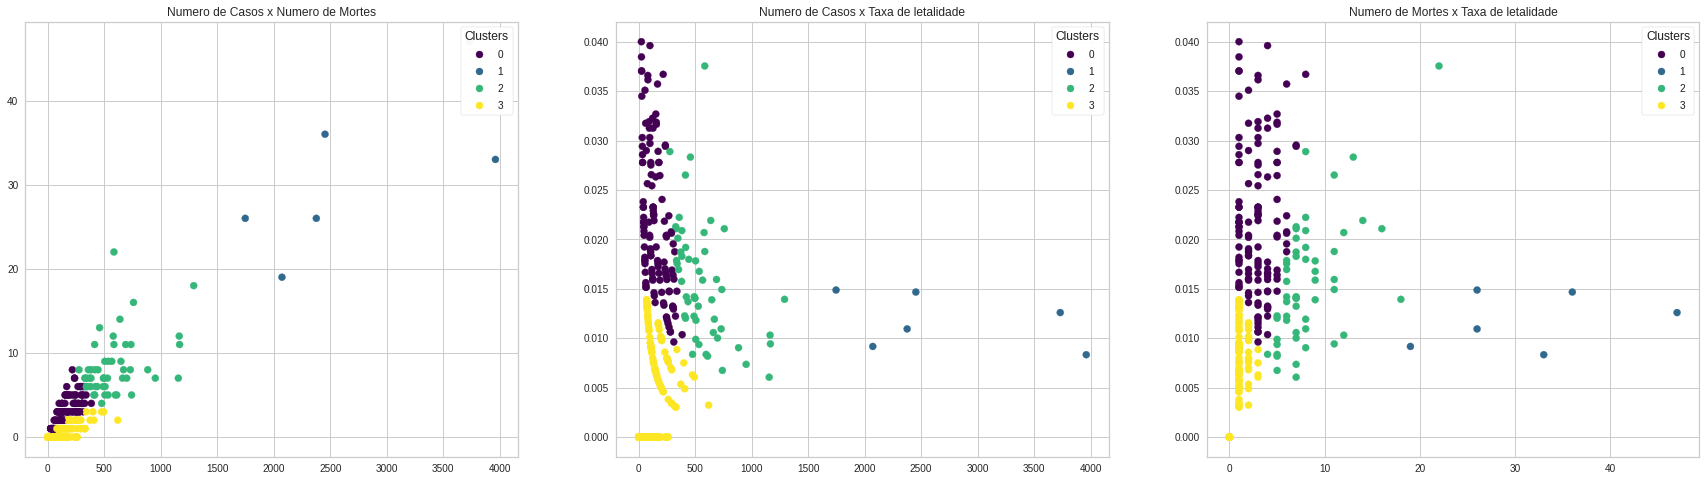

In [ ]:
plot_cluster(dados_bairros_slice2,dados_bairros_slice2['cluster'])


#### Analise dos clusters

Os clusters do slice 2 possuem caracteristicas semelhantes aos clusters do slice 1. No entanto, a letalidade dos bairros diminuiram e o número de casos aumentou.

##### Cluster 0

Observamos que o cluster 0 do slice 2 possui features semelhantes ao cluster 0 do slice 1. Ambos possuem uma quantidade média de casos de covid e de óbitos se comparados aos outros clusters. O cluster 0 do slice 2 representa 32% do total de bairros da Grande Vitória. Dados a esses fatores, concluimos que os bairros dele são de **médio risco** assim como o cluster 0 do sluce 1.

##### Cluster 1

Analisamos que o cluster 1 repetiu o comportamento do cluster 2 do slice 1 com um pequeno número de bairros com uma grande quantidade média de casos de covid e de óbito. Dessa forma, concluimos que o cluster 1 é de **risco extremo**.

##### Cluster 2

Analisamos que o cluster 2 repetiu o comportamento do cluster 3 do slice 1. Dessa forma, concluimos que os bairros desse cluster são de **alto risco**.

##### Cluster 3

O cluster 3 é semelhante ao cluster 1 do slice 1. Logo, os bairros desse cluster são de **baixo risco**.

### Slice 3

In [ ]:
info_slice(dados_slice3,dados_bairros_slice3)

Quantidade de bairros: 413
Quantidade de casos: 87586
Quantidade de óbito: 2673
Quantidade de clusters: 4


In [ ]:
avalicao_clusters(dados_slice3,dados_bairros_slice3,4)

Cluster 0
Quantidade de bairros: 164
Porcentagem do total de bairros: 40.79601990049751
Quantidade de casos: 26341
Quantidade de óbito: 984
Porcentagem de casos: 30.07444112072706
Porcentagem de óbito: 36.81257014590348
      numero_casos  numero_mortes  letalidade
mean    160.615854            6.0    0.041712
min      14.000000            1.0    0.014403
max     486.000000           14.0    0.073684
---------------------------------------------------------------


Cluster 1
Quantidade de bairros: 6
Porcentagem do total de bairros: 1.4925373134328357
Quantidade de casos: 11212
Quantidade de óbito: 313
Porcentagem de casos: 12.801132601100631
Porcentagem de óbito: 11.709689487467264
      numero_casos  numero_mortes  letalidade
mean   1868.666667      52.166667    0.030559
min    1094.000000      44.000000    0.017169
max    3087.000000      72.000000    0.050274
---------------------------------------------------------------


Cluster 2
Quantidade de bairros: 171
Porcentagem do total d

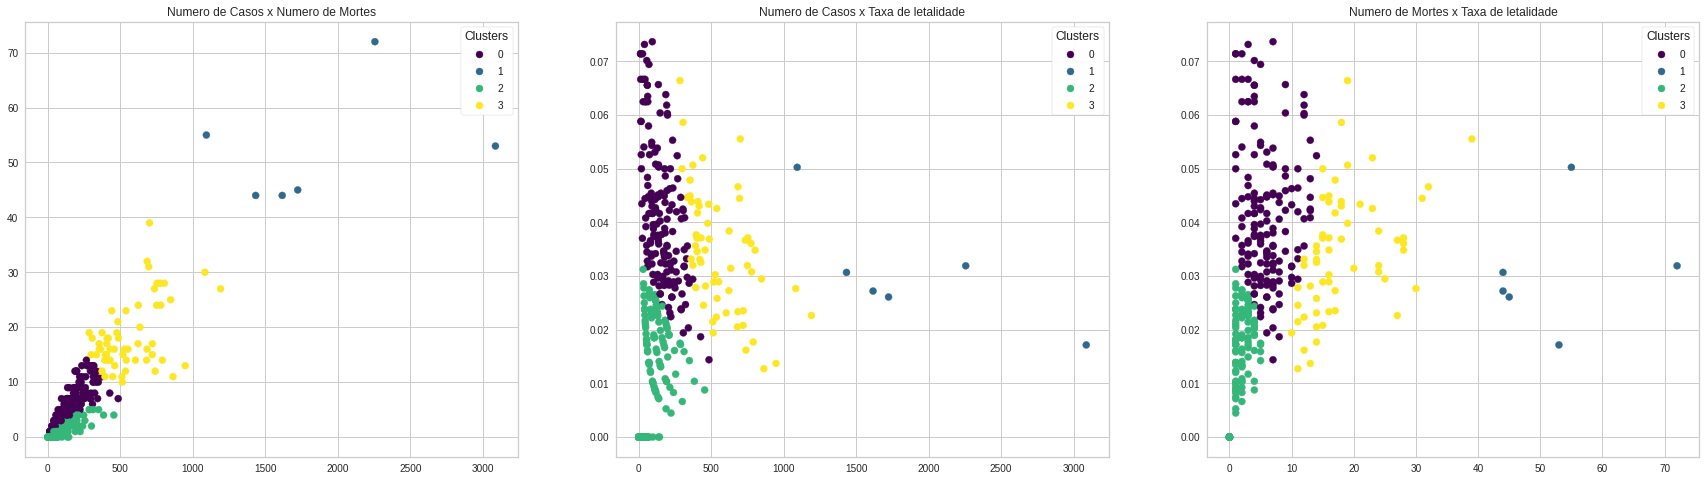

In [ ]:
plot_cluster(dados_bairros_slice3,dados_bairros_slice3['cluster'])

cluster 0 -> cluster 0 (slice 2) e cluster 0 (slice 1)

cluster 1 -> cluster 1 (slice 2) e cluster 2 (slice 1)

cluster 2 -> cluster 3 (slice 2) e cluster 1 (slice 1)

cluster 3 -> cluster 2 (slice 2) e cluster 3 (slice 1)

#### Analise dos clusters

A quantidade de casos de covid se manteve, mas a quantidade de óbitos aumentou, logo a letalidade aumentou. Podemos analisar pelos gráficos que os bairros se diferenciam mais, o que resulta numa maior esparcidade dos pontos. Além disso, alguns que estavam em baixo risco foram para clusters medio/alto risco. No entando, os clusters do slice 3 mantiveram caracteristicas semelhantes aos clusters do slices 1 e 2.

##### Cluster 0

O cluster 0 do slice 3 possui caracteristicas semelhantes ao clusters 0 dos slices 1 e 2. A única diferença relevante notada é um aumento no número de bairros. Dessa forma, os bairros desse cluster são de **médio risco**.

##### Cluster 1

O cluster 1 do slice 3 possui caracteristicas já vistas no cluster 1 do slice 2 e no cluster 2 do slice 1. Esse cluster possui os bairros de **risco extremo** que estão isolados na extremidade direita dos gráficos, com um alto número de casos e de óbitos.

##### Cluster 2

O cluster 2 do slice 3 possui caracteristicas encontradas nos clusters 3 e 1 dos slices 2 e 1, respectivamente. Ele é caracterizado pelos casos de **baixo risco**. É interessante notar a diminuição no número de casos de baixo risco com o tempo que migraram para clusters de alto risco.

Slice 1: 62% -> Slice 2: 52% -> Slice 3: 42%


#### Cluster 3

O cluster 3 do slice 3 possui caracteristicas semelhantes aos clusters 2 e 3 dos slices 2 e 1 respectivamente. É interessante notar um aumento no número de bairros de **alto risco** com o tempo:


Slice 1: 35 -> Slice 2: 53 -> Slice 3: 61


### Slice 4

In [ ]:
info_slice(dados_slice4,dados_bairros_slice4)

Quantidade de bairros: 403
Quantidade de casos: 38725
Quantidade de óbito: 437
Quantidade de clusters: 4


In [ ]:
avalicao_clusters(dados_slice4,dados_bairros_slice4,4)

Cluster 0
Quantidade de bairros: 285
Porcentagem do total de bairros: 71.96969696969697
Quantidade de casos: 14494
Quantidade de óbito: 71
Porcentagem de casos: 37.42801807617818
Porcentagem de óbito: 16.247139588100687
      numero_casos  numero_mortes  letalidade
mean      50.85614       0.249123    0.004392
min        1.00000       0.000000    0.000000
max      249.00000       1.000000    0.055556
---------------------------------------------------------------


Cluster 1
Quantidade de bairros: 102
Porcentagem do total de bairros: 25.757575757575758
Quantidade de casos: 16419
Quantidade de óbito: 258
Porcentagem de casos: 42.3989670755326
Porcentagem de óbito: 59.03890160183066
      numero_casos  numero_mortes  letalidade
mean    160.970588       2.529412    0.023368
min      27.000000       0.000000    0.000000
max     497.000000       8.000000    0.074074
---------------------------------------------------------------


Cluster 2
Quantidade de bairros: 1
Porcentagem do total de b

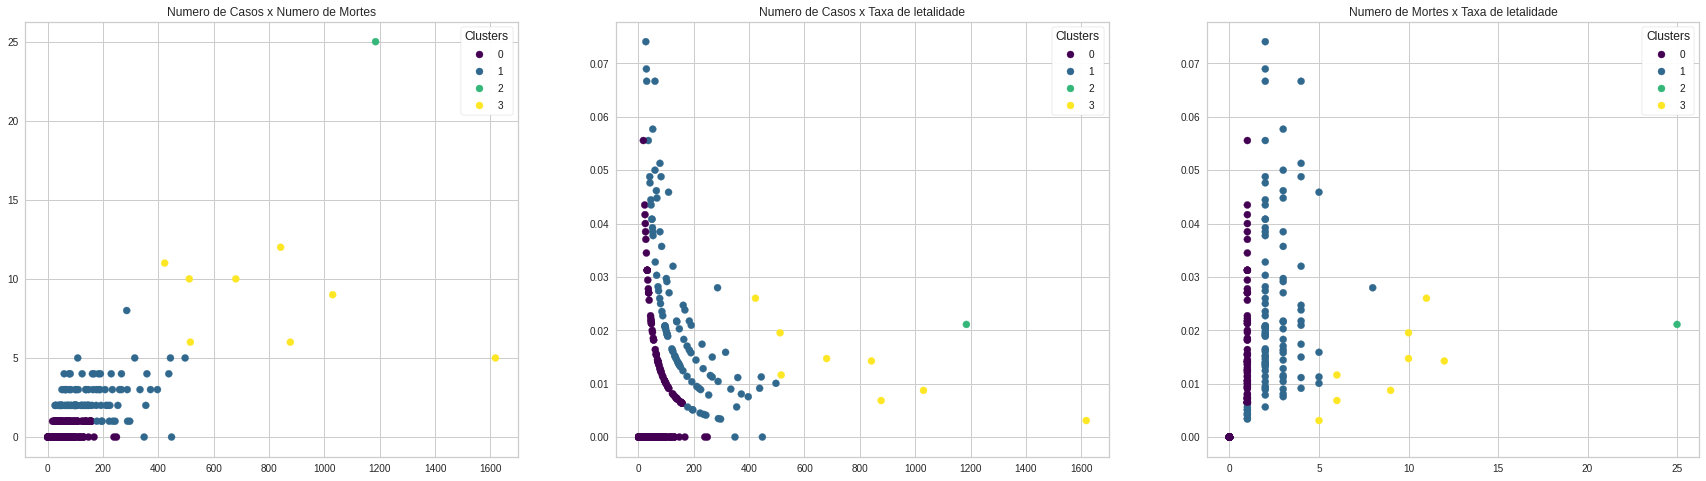

In [ ]:
plot_cluster(dados_bairros_slice4,dados_bairros_slice4['cluster'])

#### Analise dos clusters

Nesse slice de tempo ocorreu uma mudança drástica no comportamento dos clusters. Essa mudança é justificada pela efetividade das campanhas de vacinação que ocorreram no slice 3. Isso é visto na queda no número de casos e no número de óbitos. Como a diminuição do número de casos e de óbitos foi proporcinal, a letalidade se manteve.

##### Cluster 0

O cluster 0 possui uma média de casos e de óbitos baixa. Sua taxa de letalidade média é de 0.04%. Por causa dessas caracteristicas, os bairros dele são de **baixo risco**. Esse cluster representa quase 72% da quantidade total de bairros. Portanto podemos notar uma migração consideravel de bairros para a categoria de baixo risco em razão das campanhas de vacinação.

##### Cluster 1

O cluster 1 possui 25% do total de bairros da Grande Vitória. Ele representa os bairros de **médio risco**. Podemos analisar que por mais que ele represente 59% dos casos de óbito e 41% dos casos de covid, os valores máximos dessas métricas não superam 8 e 497, respectivamente.

##### Cluster 2

O cluster 2 possui um bairro, Praia da Costa (Vila Velha), sendo esse um outlier. Esse bairro teve um número alto de casos de covid e de óbito se comparado aos outros bairros. Analisando os gráficos, podemos observalo no canto superior direito, se distinguindo dos demais. Esse cluster é de **alto risco**.

##### Cluster 3

O cluster 3 possui apenas 2% do total de bairros mas representa 16% dos casos de covid e 15% dos casos de óbito. Dessa forma, podemos caracteriza-lo como sendo de **alto risco**. 


### Slice 5

In [ ]:
info_slice(dados_slice5,dados_bairros_slice5)

Quantidade de bairros: 421
Quantidade de casos: 287684
Quantidade de óbito: 3722
Quantidade de clusters: 4


In [ ]:
avalicao_clusters(dados_slice5,dados_bairros_slice5,4)

Cluster 0
Quantidade de bairros: 189
Porcentagem do total de bairros: 47.48743718592965
Quantidade de casos: 95395
Quantidade de óbito: 1451
Porcentagem de casos: 33.15964739088722
Porcentagem de óbito: 38.98441698011821
      numero_casos  numero_mortes  letalidade
mean     504.73545       7.677249    0.016082
min       40.00000       1.000000    0.008778
max     1367.00000      20.000000    0.026525
---------------------------------------------------------------


Cluster 1
Quantidade de bairros: 7
Porcentagem do total de bairros: 1.7587939698492463
Quantidade de casos: 46907
Quantidade de óbito: 511
Porcentagem de casos: 16.305043033328236
Porcentagem de óbito: 13.729177861364859
      numero_casos  numero_mortes  letalidade
mean        6701.0           73.0    0.011752
min         3896.0           47.0    0.006354
max        11331.0          122.0    0.020021
---------------------------------------------------------------


Cluster 2
Quantidade de bairros: 59
Porcentagem do total d

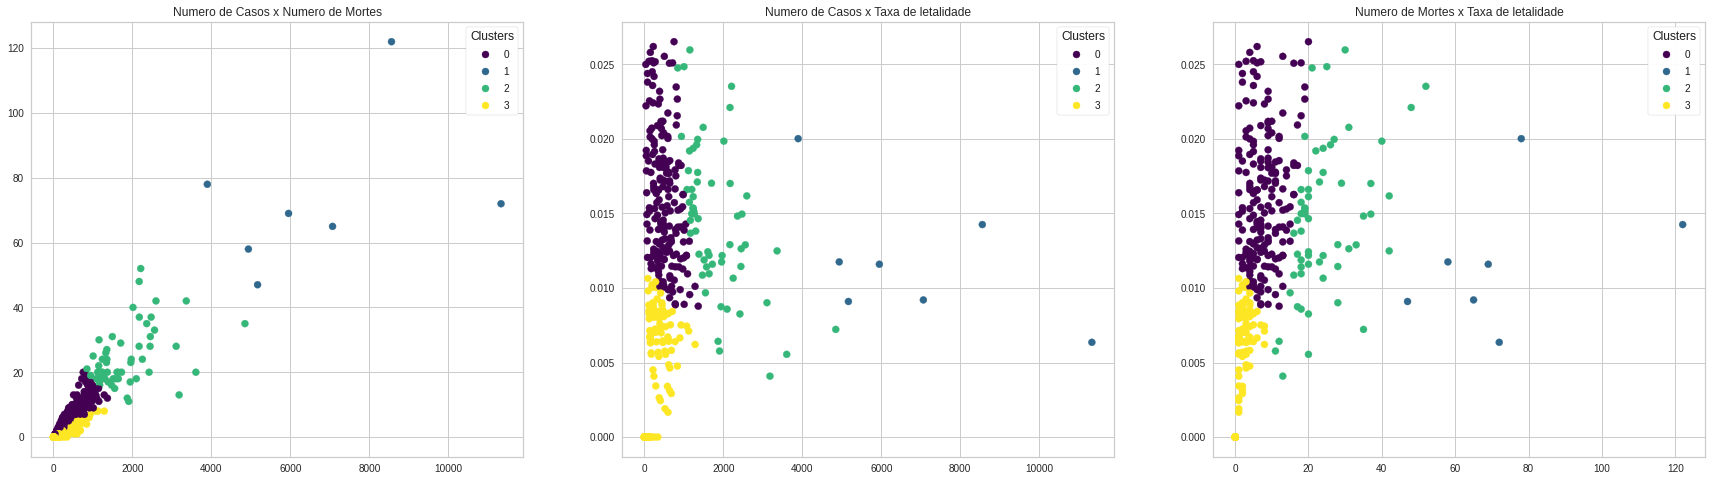

In [ ]:
plot_cluster(dados_bairros_slice5,dados_bairros_slice5['cluster'])

#### Analise dos clusters

Nesse slice de tempo ocorreu uma mudança drástica no comportamento dos clusters. Esse foi o maior pico da pandemia desde de janeiro de 2020. O número de casos foi de quase 39.000 (slice 4) para mais de 287.000 casos, isto é, 7 vezes mais o número de casos que o slice anterior. Esse aumento tambem foi visto no número de óbitos. As caracteristicas dos clusters observadas do slice 3
aparecem novamente nesse novo pico, mas em proporções maiores. No entanto, temos uma diminuição significativa na taxa de letalidade, comprovando a eficácia das vacinas.

##### Cluster 0

O cluster 0 representa os bairros de **médio risco**. Ele possui quase 50% do total de número de bairros que representam quase 39% do total de óbitos, mas ele não é de alto risco por ter muitos bairros. Se comparado aos clusters 1 e 2, ele possui uma média baixa no número de casos de covid e de óbitos por bairro.

##### Cluster 1

O cluster 1 possui os bairros com **risco extremo**. Os 7 bairros desse cluster representam 16% dos casos de covid e 13% dos casos de óbito. O número médio de casos por bairro é mais de 6000, sendo seu valor máximo 11331. O número médio de óbitos tambem é alto como é possível ver nos gráficos.

##### Cluster 2

O cluster 2 possui os bairros de **alto risco**. Mesmo possuindo a metade do número de bairros do cluster 0, sua quantidade de óbitos é quase a mesma. Além disso, ele possui um número de casos maior que o cluster 0 o que justifica a letalidade não ser maior.


##### Cluster 3

O cluster 3 possui os bairros de **baixo risco**. Ele representa 35% do total de bairros desse slice. Podemos observar uma diminuição no número de bairros de baixo risco: 72% (Slice 4) -> 35% (Slice 5). Podemos observar uma letalidade muito baixa, jusitifcada por um número de óbitos bem pequeno em relação ao número de casos de covid. 



## Analise dos bairros de risco extremo e alto.

Como o objetivo final dessa estudo é identificar os bairros de foco para as companhas de vacinação, analisamos os fluxos de entrada e saída dos bairros nos clusters de risco extremo e alto entre os slices de tempo.

In [ ]:
medio_alto_slice1 = dados_bairros_slice1.loc[dados_bairros_slice1['cluster'].isin([2,3])]
medio_alto_slice2 = dados_bairros_slice2.loc[dados_bairros_slice2['cluster'].isin([1,2])]
medio_alto_slice3 = dados_bairros_slice3.loc[dados_bairros_slice3['cluster'].isin([1,3])]
medio_alto_slice4 = dados_bairros_slice4.loc[dados_bairros_slice4['cluster'].isin([2,3])]
medio_alto_slice5 = dados_bairros_slice5.loc[dados_bairros_slice5['cluster'].isin([1,2])]

No slice 1, abril de 2020 a agosto de 2020, tinhamos 42 bairros nos clusters de risco alto e extremo. Já no slice 2, ocorreu um aumento para 59 bairros. Desses 59 bairros, 38 tambem estavam presentes no slice 1, mostrando que esses não tiveram uma melhora no número de casos e de óbito em setembro de 2020 a janeiro de 2021.

In [ ]:
medio_alto_slice2[medio_alto_slice2['bairro'].isin(medio_alto_slice1['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
1,PRAIA DA COSTA,VILA VELHA,3732,47,0.012594,1
3,JARDIM CAMBURI,VITORIA,3962,33,0.008329,1
6,MATA DA PRAIA,VITORIA,1167,11,0.009426,2
9,COLINA DE LARANJEIRAS,SERRA,1164,12,0.010309,2
10,VILA NOVA DE COLARES,SERRA,499,7,0.014028,2
11,JARDIM DA PENHA,VITORIA,2377,26,0.010938,1
13,COBILÂNDIA,VILA VELHA,508,6,0.011811,2
15,COQUEIRAL DE ITAPARICA,VILA VELHA,1156,7,0.006055,2
16,JARDIM AMÉRICA,CARIACICA,415,11,0.026506,2
18,CIDADE CONTINENTAL,SERRA,586,11,0.018771,2


Do slice 3 para o slice 2 tambem houve um aumento no número de bairros de risco alto e extremo. O slice 2 tinha 59 bairros com essa classificação e no slice 3 ocorreu um aumento de 8 bairros (67 bairros). 52 bairros do slice 2 se mantiveram com o risco extremo/alto no slice.

In [ ]:
medio_alto_slice3[medio_alto_slice3['bairro'].isin(medio_alto_slice2['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
0,PRAIA DO CANTO,VITORIA,1192,27,0.022651,3
1,COLINA DE LARANJEIRAS,SERRA,948,13,0.013713,3
2,MORADA DE LARANJEIRAS,SERRA,864,11,0.012731,3
4,ATAÍDE,VILA VELHA,736,27,0.036685,3
10,JARDIM CARAPINA,SERRA,682,14,0.020528,3
11,Não Encontrado,CARIACICA,553,16,0.028933,3
13,MATA DA PRAIA,VITORIA,721,15,0.020804,3
16,PRAIA DAS GAIVOTAS,VILA VELHA,404,15,0.037129,3
17,CIDADE CONTINENTAL,SERRA,625,24,0.038400,3
19,PRAIA DE ITAPARICA,VILA VELHA,1434,44,0.030683,1


O slice 4 é o mais átipico entre os periodos, visto que ocorreu uma queda brusca no número de mortes e no número de casos em razão das campanhas de vacinação. Nesse slice, apenas 9 bairros tiveram a classificação de risco extremo/alto se comparado aos outros bairros do slice. Todos os 9 bairros que estão presentes nesse slice com essa classificação tambem estavam presentes no slice 3.

In [ ]:
medio_alto_slice4[medio_alto_slice4['bairro'].isin(medio_alto_slice3['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
17,BAIRRO DAS LARANJEIRAS,SERRA,423,11,0.026005,3
26,JARDIM CAMBURI,VITORIA,1618,5,0.003090,3
38,PRAIA DO CANTO,VITORIA,877,6,0.006842,3
39,PRAIA DA COSTA,VILA VELHA,1185,25,0.021097,2
49,JARDIM DA PENHA,VITORIA,1030,9,0.008738,3
53,ITAPOÃ,VILA VELHA,842,12,0.014252,3
69,CENTRO,VILA VELHA,512,10,0.019531,3
76,PRAIA DE ITAPARICA,VILA VELHA,680,10,0.014706,3
100,MATA DA PRAIA,VITORIA,516,6,0.011628,3


In [ ]:
medio_alto_slice4[['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
17,BAIRRO DAS LARANJEIRAS,SERRA,423,11,0.026005,3
26,JARDIM CAMBURI,VITORIA,1618,5,0.003090,3
38,PRAIA DO CANTO,VITORIA,877,6,0.006842,3
39,PRAIA DA COSTA,VILA VELHA,1185,25,0.021097,2
49,JARDIM DA PENHA,VITORIA,1030,9,0.008738,3
53,ITAPOÃ,VILA VELHA,842,12,0.014252,3
69,CENTRO,VILA VELHA,512,10,0.019531,3
76,PRAIA DE ITAPARICA,VILA VELHA,680,10,0.014706,3
100,MATA DA PRAIA,VITORIA,516,6,0.011628,3


In [ ]:
medio_alto_slice3[['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
0,PRAIA DO CANTO,VITORIA,1192,27,0.022651,3
1,COLINA DE LARANJEIRAS,SERRA,948,13,0.013713,3
2,MORADA DE LARANJEIRAS,SERRA,864,11,0.012731,3
4,ATAÍDE,VILA VELHA,736,27,0.036685,3
10,JARDIM CARAPINA,SERRA,682,14,0.020528,3
...,...,...,...,...,...,...
229,JARDIM TROPICAL,SERRA,605,14,0.023140,3
250,SANTO ANDRÉ,CARIACICA,431,16,0.037123,3
255,CENTRAL CARAPINA,SERRA,448,11,0.024554,3
291,SÃO GERALDO,CARIACICA,365,16,0.043836,3


O slice 5 é o último represetando os periodos de dezembro de 2021 a fevereiro de 2022. Nesse periodo ocorreu um aumento dos números de casos e e óbitos. Foram 66 bairros classificados como risco extremo/alto, sendo 9 deles mantidos do slice 4. Desses 66, 54 bairros que estavam nessa classificação no slice 3 voltaram. 

In [ ]:
medio_alto_slice5[['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
2,PARQUE RESIDENCIAL LARANJEIRAS,SERRA,1643,18,0.010956,2
3,JARDIM CAMBURI,VITORIA,11331,72,0.006354,1
4,JARDIM DA PENHA,VITORIA,7066,65,0.009199,1
7,PRAIA DA COSTA,VILA VELHA,8558,122,0.014256,1
12,CIDADE CONTINENTAL,SERRA,2169,28,0.012909,2
...,...,...,...,...,...,...
238,CARAPINA GRANDE,SERRA,1971,24,0.012177,2
259,SANTANA,CARIACICA,1169,17,0.014542,2
260,ITACIBÁ,CARIACICA,1240,19,0.015323,2
267,NOVA ROSA DA PENHA,CARIACICA,2454,31,0.012632,2


In [ ]:
medio_alto_slice5[medio_alto_slice5['bairro'].isin(medio_alto_slice4['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
3,JARDIM CAMBURI,VITORIA,11331,72,0.006354,1
4,JARDIM DA PENHA,VITORIA,7066,65,0.009199,1
7,PRAIA DA COSTA,VILA VELHA,8558,122,0.014256,1
13,MATA DA PRAIA,VITORIA,3107,28,0.009012,2
31,BAIRRO DAS LARANJEIRAS,SERRA,2596,42,0.016179,2
36,PRAIA DE ITAPARICA,VILA VELHA,4936,58,0.011750,1
38,PRAIA DO CANTO,VITORIA,5168,47,0.009094,1
39,ITAPOÃ,VILA VELHA,5952,69,0.011593,1
86,CENTRO,VITORIA,3896,78,0.020021,1


In [ ]:
medio_alto_slice5[~medio_alto_slice5['bairro'].isin(medio_alto_slice4['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
2,PARQUE RESIDENCIAL LARANJEIRAS,SERRA,1643,18,0.010956,2
12,CIDADE CONTINENTAL,SERRA,2169,28,0.012909,2
14,NOVO HORIZONTE,SERRA,2422,20,0.008258,2
19,VALPARAÍSO,SERRA,1869,12,0.006421,2
20,JARDIM LIMOEIRO,SERRA,2252,24,0.010657,2
21,CENTRAL CARAPINA,SERRA,1473,16,0.010862,2
24,NOVA CARAPINA I,SERRA,1725,20,0.011594,2
25,SANTO ANTÔNIO,VITORIA,2015,40,0.019851,2
29,SÃO GERALDO,SERRA,1269,19,0.014972,2
30,MORADA DE LARANJEIRAS,SERRA,3182,13,0.004085,2


In [ ]:
medio_alto_slice5[medio_alto_slice5['bairro'].isin(medio_alto_slice3['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
2,PARQUE RESIDENCIAL LARANJEIRAS,SERRA,1643,18,0.010956,2
3,JARDIM CAMBURI,VITORIA,11331,72,0.006354,1
4,JARDIM DA PENHA,VITORIA,7066,65,0.009199,1
7,PRAIA DA COSTA,VILA VELHA,8558,122,0.014256,1
12,CIDADE CONTINENTAL,SERRA,2169,28,0.012909,2
...,...,...,...,...,...,...
238,CARAPINA GRANDE,SERRA,1971,24,0.012177,2
259,SANTANA,CARIACICA,1169,17,0.014542,2
260,ITACIBÁ,CARIACICA,1240,19,0.015323,2
267,NOVA ROSA DA PENHA,CARIACICA,2454,31,0.012632,2


In [ ]:
medio_alto_slice5[~medio_alto_slice5['bairro'].isin(medio_alto_slice3['bairro'])][['bairro','municipio','numero_casos','numero_mortes','letalidade','cluster']]

,bairro,municipio,numero_casos,numero_mortes,letalidade,cluster
34,BENTO FERREIRA,VITORIA,1906,11,0.005771,2
76,ARAÇÁS,VILA VELHA,1143,18,0.015748,2
197,CARIACICA SEDE,CARIACICA,1170,16,0.013675,2


# Conclusão



Iniciamos nossa analise dos casos de óbito por covid-19 na Grande Vitória estudando as features dos pacientes. No entanto, ao utilizar o algoritmo k-modes para clusterizar os dados, percebeu-se que não havia uma correlação entre os mesmos. Observou-se que grande parte dos features apenas se dividiam igualmente entre os clusters. Os features que mais pareceram influenciar na clusterização foram as datas.

Com isso, realizamos uma segunda abordagem que teve como objetivo clusterizar os bairros da Grande Vitória com base na quantidade de casos de covid, a quantidade de óbitos e a taxa de letalidade. Assim, visavamos encontrar os bairros de risco alto e extremo para focar as campanhas de vacinação, conscientização e prevenção da covid-19. Sabendo que o covid possui uma relação com o tempo, dividimos os dados em 5 slices de tempo e criamos clusters para cada um deles.

Analisando os slices de tempo percebemos um aumento gradativo na quantidade e bairros com risco alto e extremos entre os slices 1,2 e 3, e tambem analisamos que muitos bairros se mantiveram com essa classificação nesse periodo. Com a queda do número de casos no slice 4, acreditavamos que não teriamos um retorno significativo de bairros que anteriormente tinham a classificação de risco alto/extremo no slice 3. No entanto, na nova onda de covid-19 os bairros com risco alto/extremo seguem os mesmos. 94% dos bairros que estavam no slice 3, antes da onde, retornaram no slice 5, sendo esses os bairros que necessitam de foco nas campanhas de vacinação, prevenção e conscientização.

 